In [4]:
# Testing your installation
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
from sklearn.datasets import load_wine

In [6]:
X,y = load_wine(return_X_y = True)
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [7]:
y = pd.get_dummies(y, prefix = 'Class')
y

,Class_0,Class_1,Class_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [43]:
# Preparing our model
model = keras.models.Sequential()

In [44]:
# Prepare our layers
from keras.layers import Dense

In [45]:
# Creating our Architecture
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.20)

Epoch 1/200
4/4 [==============================] - 0s 35ms/step - loss: 0.6019 - accuracy: 0.7475 - val_loss: 0.7495 - val_accuracy: 0.6800
Epoch 2/200
4/4 [==============================] - 0s 18ms/step - loss: 0.6149 - accuracy: 0.7172 - val_loss: 0.6804 - val_accuracy: 0.7200
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.7926 - accuracy: 0.6970 - val_loss: 1.2627 - val_accuracy: 0.6000
Epoch 4/200
4/4 [==============================] - 0s 18ms/step - loss: 1.8347 - accuracy: 0.5455 - val_loss: 1.7391 - val_accuracy: 0.4800
Epoch 5/200
4/4 [==============================] - 0s 18ms/step - loss: 1.1984 - accuracy: 0.6162 - val_loss: 2.2558 - val_accuracy: 0.6400
Epoch 6/200
4/4 [==============================] - 0s 23ms/step - loss: 2.3672 - accuracy: 0.6465 - val_loss: 2.5776 - val_accuracy: 0.4800
Epoch 7/200
4/4 [==============================] - 0s 20ms/step - loss: 2.2898 - accuracy: 0.5051 - val_loss: 2.1131 - val_accuracy: 0.4800
Epoch 8/200
4/4 [===

In [49]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1058 - accuracy: 0.9630


[0.1057601273059845, 0.9629629850387573]

In [52]:
data = pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.601879,0.747475,0.749536,0.68
1,0.614900,0.717172,0.680365,0.72
2,0.792613,0.696970,1.262738,0.60
3,1.834747,0.545455,1.739117,0.48
4,1.198432,0.616162,2.255834,0.64
...,...,...,...,...
195,0.340666,0.858586,0.249852,0.92
196,0.206363,0.909091,0.263664,0.84
197,0.200654,0.939394,0.236093,0.88
198,0.222500,0.888889,0.260011,0.92


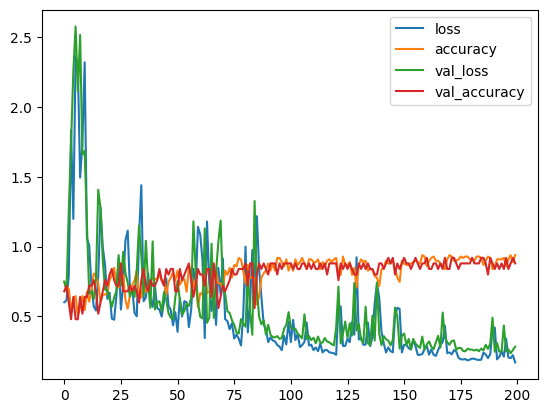

In [54]:
import matplotlib.pyplot as plt
data.plot()
plt.show()